In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
# Set plot style
sns.set_style("whitegrid")

### Task 1: The Dataset
- Loading and Familiarizing with the Data
- Are there any interesting things that stand out?

In [4]:
# Defining the path to dataset
file_path = 'ml-engineer-dataset.csv'


In [5]:
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully from: {file_path}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found! Please put it in the correct directory.")
    exit()

Dataset loaded successfully from: ml-engineer-dataset.csv


In [6]:
# Initial Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43847 entries, 0 to 43846
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   contract-delivery        43847 non-null  object 
 1   demand-forecast          43847 non-null  float64
 2   temperature-normal       43847 non-null  float64
 3   temperature-forecast     43847 non-null  float64
 4   solar-forecast           43847 non-null  float64
 5   day-ahead-auction-price  43847 non-null  float64
 6   wind-forecast            43847 non-null  float64
 7   day-ahead-auction-time   43847 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.7+ MB


In [7]:

# Thoughts:
# Only two columns are found to be of object (string) datatype --> `contract-delivery` and `day-ahead-auction-time`
# No missing values, i.e., non-null. No need for imputation.

In [8]:
# First 5 rows
print(df.head())

           contract-delivery  demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast     day-ahead-auction-time
0  2020-01-01 00:00:00+00:00         43471.50            1.317628                   0.6             0.0                    38.60        7019.50  2019-12-31 11:00:00+00:00
1  2020-01-01 01:00:00+00:00         42555.50            1.285980                   0.3             0.0                    36.55        7407.00  2019-12-31 11:00:00+00:00
2  2020-01-01 02:00:00+00:00         42448.25            1.224420                  -0.1             0.0                    32.32        7540.50  2019-12-31 11:00:00+00:00
3  2020-01-01 03:00:00+00:00         42567.75            1.169376                  -0.4             0.0                    30.85        7802.75  2019-12-31 11:00:00+00:00
4  2020-01-01 04:00:00+00:00         42209.00            1.101194                  -0.7             0.0                    30.14        7805.75  

In [9]:
# Last 10 rows:")
print(df.tail(10))

               contract-delivery  demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast     day-ahead-auction-time
43837  2024-12-31 13:00:00+00:00         55859.00            3.590067                   2.8          6948.0                    76.84       24589.50  2024-12-30 11:00:00+00:00
43838  2024-12-31 14:00:00+00:00         54947.50            3.293482                   2.1          2520.5                    82.07       27248.50  2024-12-30 11:00:00+00:00
43839  2024-12-31 15:00:00+00:00         54901.75            2.769080                   1.3           123.5                    83.67       29551.25  2024-12-30 11:00:00+00:00
43840  2024-12-31 16:00:00+00:00         56314.00            2.488333                   0.9             2.5                    83.25       30399.00  2024-12-30 11:00:00+00:00
43841  2024-12-31 17:00:00+00:00         56915.00            2.249007                   0.9             1.5                  

In [10]:
# Thoughts:
# 'contract-delivery' progresses hourly
# while 'day-ahead-auction-time' updates daily for 24 new contracts (single contract per hour).

In [11]:
# Statistics
print(df.describe())

       demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast
count     43847.000000        43847.000000          43847.000000    43847.000000             43847.000000   43847.000000
mean      54168.834658           10.027417             11.171371     6110.825530               107.447477   14793.633972
std        9232.674783            6.724638              7.429299     9450.017605               105.707266   10952.121262
min       30544.750000           -0.119118            -11.200000        0.000000              -500.000000      46.500000
25%       46634.625000            3.528642              5.400000        1.500000                41.350000    5880.000000
50%       54049.250000            9.707157             10.600000      188.250000                81.740000   11889.750000
75%       61762.125000           15.601056             16.800000     9680.125000               129.705000   21702.500000
max       77585.750000          

In [26]:
# Thoughts:
# row 'min' has negative values. Looks like high renewable penetration.
# happens where supply (especially renewables) exceeds demand, and generators might pay to offload electricity to avoid grid instability.
# row 'max' high price spikes: 2325 Eur 
# Model must be able to predict these values and outliers.

In [13]:
# Incorrect data types --> Data Type Conversion
# `contract-delivery` and `day-ahead-auction-time` are strings. They should ideally be ´datetime` objects.
df['contract-delivery'] = pd.to_datetime(df['contract-delivery'])
df['day-ahead-auction-time'] = pd.to_datetime(df['day-ahead-auction-time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43847 entries, 0 to 43846
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   contract-delivery        43847 non-null  datetime64[ns, UTC]
 1   demand-forecast          43847 non-null  float64            
 2   temperature-normal       43847 non-null  float64            
 3   temperature-forecast     43847 non-null  float64            
 4   solar-forecast           43847 non-null  float64            
 5   day-ahead-auction-price  43847 non-null  float64            
 6   wind-forecast            43847 non-null  float64            
 7   day-ahead-auction-time   43847 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(6)
memory usage: 2.7 MB


In [27]:
# Sorting and Unique Identifiers
# Mulitple rows with same 'day-ahead-auction-time' found. So, sorting this group further by 'contract-delivery'
# ensuring no data leak while training 
# info available before the auction time must be used for prediction 

df = df.sort_values(by=['day-ahead-auction-time', 'contract-delivery']).reset_index(drop=True)

In [28]:
# Check for uniqueness of 'contract-delivery' as a row identifier
if df['contract-delivery'].is_unique:
    print("Well-informed: Unique event for each row is identified.")
else:
    print("Event is NOT unique or found an issue.")

Well-informed: Unique event for each row is identified.


In [29]:
# Check for duplicates across all columns
if df.duplicated().any():
    print(f"Duplicate rows found! Number of duplicate rows: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [30]:
# Missing values analysis
print(df.isnull().sum())

contract-delivery          0
demand-forecast            0
temperature-normal         0
temperature-forecast       0
solar-forecast             0
day-ahead-auction-price    0
wind-forecast              0
day-ahead-auction-time     0
dtype: int64


In [31]:
# Relationship b/n Auction Time and Delivery Time

time_difference = df['contract-delivery'] - df['day-ahead-auction-time']
print(f"\nAverage time difference between contract delivery and auction time: {time_difference.mean()}")
print(f"Min time difference: {time_difference.min()}")
print(f"Max time difference: {time_difference.max()}")



Average time difference between contract delivery and auction time: 0 days 23:30:01.354710698
Min time difference: 0 days 12:00:00
Max time difference: 1 days 12:00:00


In [32]:
# Thoughts:
# This is the day-ahead auction market structure
# Shortest lag/'min' difference = 12 hours (00:00 delivery, auction at 12:00 previous day)
# Longest lag/'max' difference = 36 hours


In [20]:
# Assuming provided timestamps are in UTC.
# CET is UTC+1 during standard time, UTC+2 during daylight saving.

# Let's re-calculate time differences based on UTC delivery and auction times.
# The calculation `df['contract-delivery'] - df['day-ahead-auction-time']` correctly gives the timedelta.


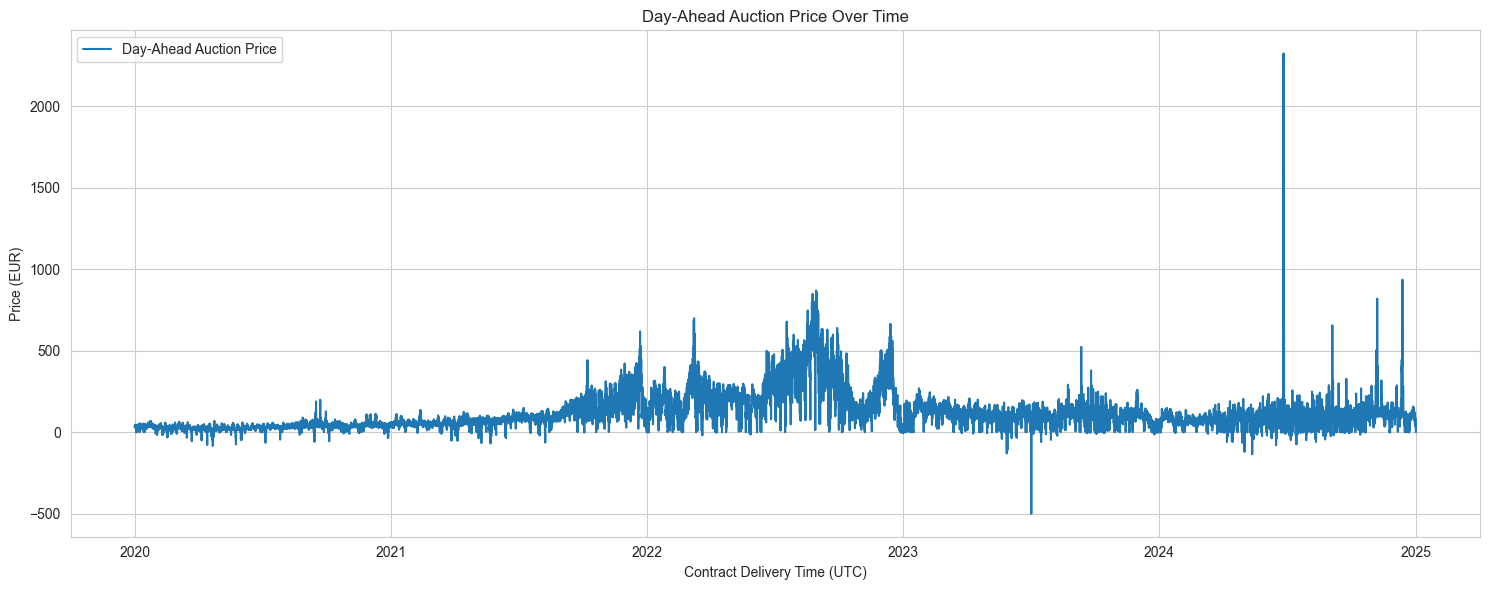

In [21]:
# Visualisation Key data Distributions and Time Series Patterns

# Day-Ahead Auction Price Over Time
plt.figure(figsize=(15, 6))
plt.plot(df['contract-delivery'], df['day-ahead-auction-price'], label='Day-Ahead Auction Price')
plt.title('Day-Ahead Auction Price Over Time')
plt.xlabel('Contract Delivery Time (UTC)')
plt.ylabel('Price (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
# Thoughts:
# spikes and negative prices were visible. High demand & low supply vice-versa.
# high volatile & have non linear relations 

Text(0, 0.5, 'Frequency')

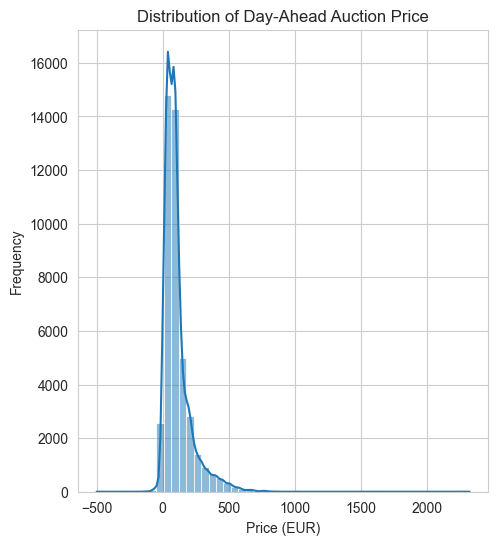

In [22]:
# Day-Ahead Auction Price Distribution
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['day-ahead-auction-price'], bins=50, kde=True)
plt.title('Distribution of Day-Ahead Auction Price')
plt.xlabel('Price (EUR)')
plt.ylabel('Frequency')

In [34]:
# Thoughts:
# distribution is highly right-skewed

Text(0, 0.5, 'Frequency')

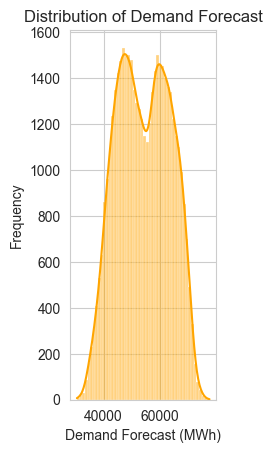

In [23]:
# Demand Forecast Distribution

plt.subplot(1, 3, 2)
sns.histplot(df['demand-forecast'], bins=50, kde=True, color='orange')
plt.title('Distribution of Demand Forecast')
plt.xlabel('Demand Forecast (MWh)')
plt.ylabel('Frequency')

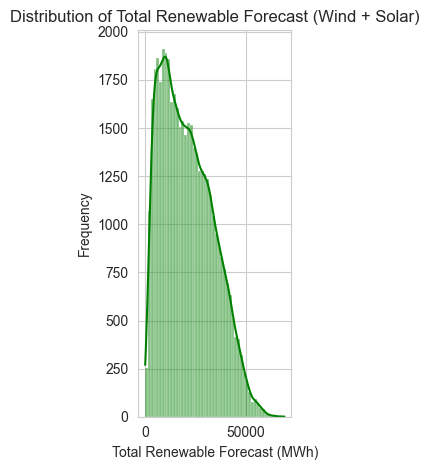

In [24]:
# Total Renewable Forecast

plt.subplot(1, 3, 3)
sns.histplot(df['wind-forecast'] + df['solar-forecast'], bins=50, kde=True, color='green')
plt.title('Distribution of Total Renewable Forecast (Wind + Solar)')
plt.xlabel('Total Renewable Forecast (MWh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Thoughts:
# distribution is right-skewed

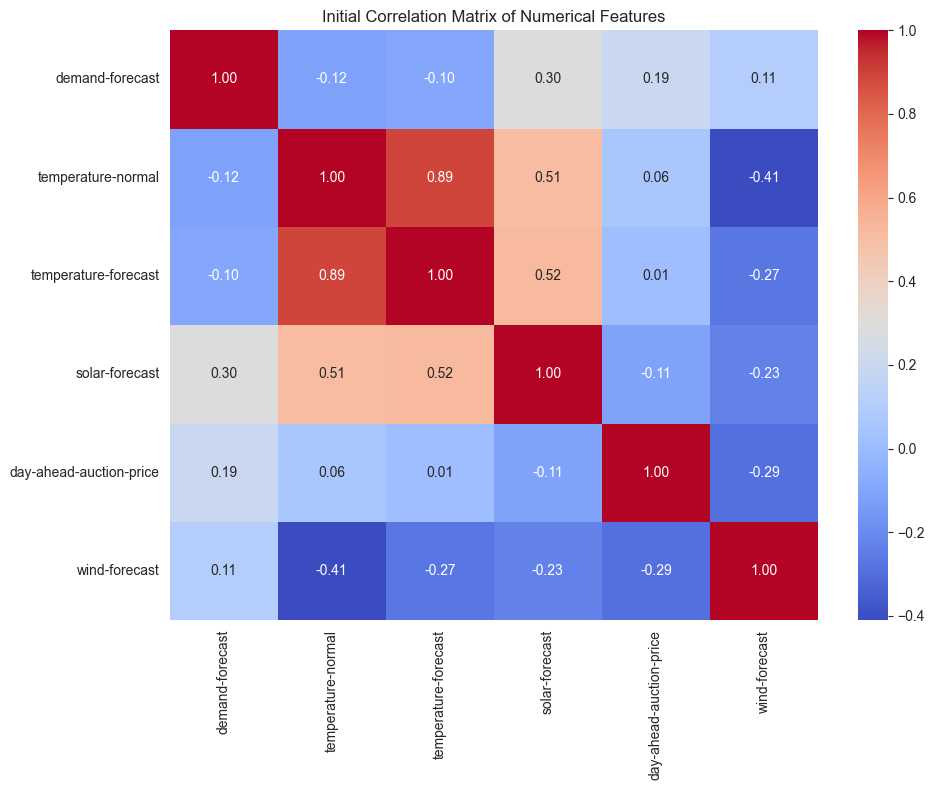

                         demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast
demand-forecast                 1.000000           -0.115556             -0.095990        0.299509                 0.194064       0.107392
temperature-normal             -0.115556            1.000000              0.892352        0.513392                 0.058104      -0.410359
temperature-forecast           -0.095990            0.892352              1.000000        0.520240                 0.012175      -0.268210
solar-forecast                  0.299509            0.513392              0.520240        1.000000                -0.108085      -0.231720
day-ahead-auction-price         0.194064            0.058104              0.012175       -0.108085                 1.000000      -0.290764
wind-forecast                   0.107392           -0.410359             -0.268210       -0.231720                -0.290764       1.000000


In [25]:
# Correlation Matrix during this phase

numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Initial Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()
print(corr_matrix)

In [37]:
# Thoughts:
# auction price has a positive correlation with demand forecase (0.19)
# -- > higher the demand higher the prices
# auction price has a negative correl with wind (-0.29) & solar (-0.11) forecast
# -- > solar is available only during daylight time, hence weaker correl
# temp-normal +ive correl with solar forecast (0.51)
# -- > more sun during warmer periods
# wind forecase has -ve correl with temp-normal (-0.41) & temp forecast (-0.27)
# -- > may be due to season. colder time means low normal temp and are windier

In [ ]:
# for linear models
#-- > we might not need both temp-normal & temp-forecast, bcz they have high correl

